In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras

from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [2]:
train_datagen =  ImageDataGenerator(zoom_range=0.5, shear_range=0.3, horizontal_flip= True, preprocessing_function=preprocess_input)
 
val_datagen =  ImageDataGenerator(preprocessing_function= preprocess_input)

In [4]:
train = train_datagen.flow_from_directory(directory="train", 
                                          target_size=(256,256), 
                                          batch_size=32)

val = val_datagen.flow_from_directory(directory="valid",
                                      target_size=(256, 256), 
                                      batch_size=32)

Found 63497 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [5]:
t_img , label = train.next()

In [6]:
def plotImage(img_arr, label):
     
     for im, l in zip(img_arr, label):
       plt.figure(figsize=(5,5))
       plt.imshow(im)
       plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


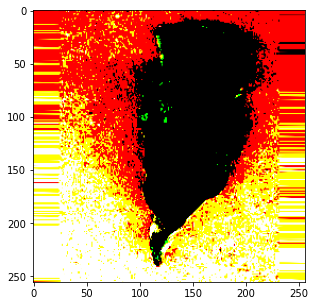

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


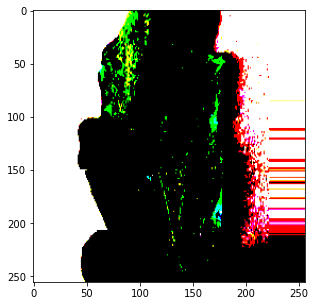

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


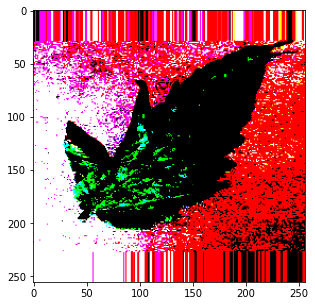

In [7]:
plotImage(t_img[:3], label[:3])

In [8]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [9]:
base_model = VGG19(input_shape=(256,256,3), include_top = False)

80150528/80134624 [==============================] - 30s 0us/step


In [10]:
for layer in base_model.layers:
    layer.trainable = False

In [11]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [13]:
X = Flatten()(base_model.output)

X = Dense(units=38, activation='softmax')(X)

# Creating Our model

model= Model(base_model.input, X)

In [14]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

In [15]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy ,metrics= ['accuracy'])

In [16]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

#early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01,patience=3,verbose=1)

#model check point
mc = ModelCheckpoint(filepath="best_model.h5",monitor='val_accuracy', min_delta=0.01,patience=3,verbose=1,save_best_only= True)
cb =[es,mc]

In [3]:
his= model.fit_generator(train, 
                         steps_per_epoch=60, 
                         epochs=20, 
                         verbose=1, 
                         callbacks=cb, 
                         validation_data=val, 
                         validation_steps=4)

NameError: name 'model' is not defined

In [4]:
h = his.history
h.keys()

NameError: name 'his' is not defined

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c="red")
plt.title('acc vs v-acc')
plt.show()

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c="red")
plt.title('acc vs v-acc')
plt.show()

In [ ]:
#load best model
from keras.models import load_model
model = load_model("best_model.h5")

In [ ]:
acc =model.evaluate_generator(val)[1]

print(f"The accuracy of your model is = {acc*100}%")

In [ ]:
dict(zip(list(train.class_indices.values()), list(train.class_indices.keys()) ))

In [ ]:
def Treatment(pred):

    if(pred == 0):
        print("Disease Name: Apple scab")
        print("Plant Name:Apple")
        print("Disease Detection:")
        print("Apple scab produces dark blotches or lesions on the leaves, fruit, and sometimes young twigs. Infections in young leaves often cause leaf deformities, and affected plants may drop their fruit prematurely. All apple species (genus Malus) are affected, though some cultivars have greater resistance.")
        print("Causese Of Disease:")
        print(" disease of apple trees caused by the ascomycete fungus Venturia inaequalis. Apple scab is found wherever apples and crabapples are grown but is most severe where spring and summer are cool and moist. The disease can cause high crop losses and is thus of economic import to apple growers.")
        print("Disease Treatment:")
        print("Apple Scab can be treated with: Propizol® Fungicide (Crabapples only) or PHOSPHO-jet. *Propizol is for ornamental use only. Fruit are not to be used for human or animal consumption.")
        print("Health tips:")
        print(" Regular spraying with fungicides is the most effective method of controlling the disease.")

    if(pred == 1):
        print("Disease Name:Black rot")
        print("Plant Name:Apple")
        print("Disease Detection:")
        print("When an apple is cut (or bruised), oxygen is introduced into the injured plant tissue. When oxygen is present in cells, polyphenol oxidase (PPO) enzymes in the chloroplasts rapidly oxidize phenolic compounds naturally present in the apple tissues to o-quinones, colorless precursors to brown-colored secondary products")
        print("Causese Of Disease:")
        print("Black rot is caused by the fungus Diplodia seriata (syn Botryosphaeria obtusa). The fungus can infect dead tissue as well as living trunks, branches, leaves and fruits. The black rot fungi survive Minnesota winters in branch cankers and mummified fruit (shriveled and dried fruit) attached to the tree.")
        print("Disease Treatment:")
        print("1.Prune out dead or diseased branches.\n 2.Pick all dried and shriveled fruits remaining on the trees.\n 3.Remove infected plant material from the area.\n 4.All infected plant parts should be burned, buried or sent to a municipal composting site.\n 5.Be sure to remove the stumps of any apple trees you cut down.")
        print("Health tips:")
        print("Black rot spores love moisture, so you want to reduce the amount of moisture held in the canopy by providing great air circulation. During dormancy, prune heavily keeping only a few healthy, strong canes from last year's growth. Prune out any diseased parts of the vine too.")

    if(pred ==2):
        print("Disease Name:Cedar_apple_rust")
        print("Plant Name:Apple")
        print("Disease Detection:")
        print("Cedar apple rust (Gymnosporangium juniperi-virginianae) is a fungal disease that requires juniper plants to complete its complicated two year life-cycle. Spores overwinter as a reddish-brown gall on young twigs of various juniper species. In early spring, during wet weather, these galls swell and bright orange masses of spores are blown by the wind where they infect susceptible apple and crab-apple trees. The spores that develop on these trees will only infect junipers the following year. From year to year, the disease must pass from junipers to apples to junipers again; it cannot spread between apple trees.")
        print("Causese Of Disease:")
        print("All are caused by different species of the fungus Gymnosporangium and have various junipers and red cedars (juniperus species) as an alternate host. Apples are generally most susceptible to infection by the rust fungi during the period from early bloom until about 30 days after bloom.")
        print("Disease Treatment:")
        print("1.Choose resistant cultivars when available.\n 2.Rake up and dispose of fallen leaves and other debris from under trees.\n 3.Remove galls from infected junipers. In some cases, juniper plants should be removed entirely.")
        print("Health tips:")
        print(" Spraying apple trees with copper can be done to treat cedar apple rust and prevent other fungal infections.")    

    if(pred ==3):
        print("Healthy Apple")
        print("No need to any effort on it. Just give them basic needs for better growth and production. Plants need air, light, warmth, water and nutrients to be healthy.")
        
    if(pred ==4):
        print("Healthy Blueberry ")
        print("No need to any effort on it.  Just give them basic needs for better growth and production. Plants need air, light, warmth, water and nutrients to be healthy.")
        
    if(pred ==5):
        print("Disease Name: Cherry powdery mildew")
        print("Plant Name:Cherry_(including_sour)")
        print("Disease Detection:")
        print("It is important to know when cherry powdery mildew is active because often growers only manage the disease during the cherry fruit growing season. Continue management during the full fungal growing season which continues through late summer and early fall")
        print("Causese Of Disease:")
        print("It is caused by Podosphaera clandestina, an obligate biotrophic fungus. Mid- and late-season sweet cherry (Prunus avium) cultivars are commonly affected, rendering them unmarketable due to the covering of white fungal growth on the cherry surface.")
        print("Disease Treatment:")
        print("Spray on plants every one to two weeks. Potassium bicarbonate– Similar to baking soda, this has the unique advantage of actually eliminating powdery mildew once it's there. Potassium bicarbonate is a contact fungicide which kills the powdery mildew spores quickly.")
        print("Health tips:")
        print("Season long disease control of both leaves and fruit is critical to minimize overall disease pressure in the orchard and consequently to protect developing fruit from accumulating spores on their surfaces.")

    if(pred ==6):
        print("Healthy Cherry")
        print("No need to any effort on it.  Just give them basic needs for better growth and production. Plants need air, light, warmth, water and nutrients to be healthy.")

    if(pred ==7):
        print("Disease Name: Cercospora leafspot Gray leafspot ")
        print("Plant Name: Corn_(maize)")
        print("Disease Detection:")
        print("Grey leaf spot (GLS) is a foliar fungal disease that affects maize, also known as corn. GLS is considered one of the most significant yield-limiting diseases of corn worldwide. There are two fungal pathogens that cause GLS: Cercospora zeae-maydis and Cercospora zeina.")
        print("Causese Of Disease:")
        print("Gray leaf spot on corn, caused by the fungus Cercospora zeae-maydis, is a peren- nial and economically damaging disease in the United States. Since the mid-1990s, the disease has increased in importance in Indiana, and now is the one of the most important foliar diseases of corn in the state.")
        print("Disease Treatment:")
        print("Management strategies for gray leaf spot include tillage, crop rotation and planting resistant hybrids. Fungicides may be needed to prevent significant loss when plants are infected early and environmental conditions favor disease.")
        print("Health tips:")
        print("Avoid fields with poor air circulation. Chemical Controls & Pesticides")

    if(pred ==8):
        print("Disease Name: Common rust")
        print("Plant Name:Corn_(maize)")
        print("Disease Detection:")
        print("Common rust produces rust-colored to dark brown, elongated pustules on both leaf surfaces. The pustules contain rust spores (urediniospores) that are cinnamon brown in color. Pustules darken as they age. Leaves, as well as sheaths, can be infected.")
        print("Causese Of Disease:")
        print("Common rust produces rust-colored to dark brown, elongated pustules on both leaf surfaces. The pustules contain rust spores (urediniospores) that are cinnamon brown in color. Pustules darken as they age. Leaves, as well as sheaths, can be infected.")
        print("Disease Treatment:")
        print("To reduce the incidence of corn rust, plant only corn that has resistance to the fungus. Resistance is either in the form of race-specific resistance or partial rust resistance. In either case, no sweet corn is completely resistant. If the corn begins to show symptoms of infection, immediately spray with a fungicide.")

    if(pred ==9):
        print("Disease Name: Northern Leaf blight")
        print("Plant Name:Corn_(maize)")
        print("Disease Detection:")
        print("Northern corn leaf blight (NCLB) is caused by the fungus Setosphaeria turcica. Symptoms usually appear first on the lower leaves. Leaf lesions are long (1 to 6 inches) and elliptical, gray-green at first but then turn pale gray or tan. Under moist conditions, dark gray spores are produced, usually on the lower leaf surface, which give lesions a dirty gray appearance. Entire leaves oneverely blighted plants can die, so individual lesions are not visible. Lesions may occur on the outer husk of ears, but the kernels are not infected. On hybrids that contain an Ht gene for resistance to the fungus, lesions are smaller, chlorotic, and may develop into linear streaks. These lesions rarely produce spores.")
        print("Causese Of Disease:")
        print("corn (maize) caused by Exserohilum turcicum, the anamorph of the ascomycete Setosphaeria turcica. With its characteristic cigar-shaped lesions, this disease can cause significant yield loss in susceptible corn hybrids.")
        print("Disease Treatment:")
        print("Treating northern corn leaf blight involves using fungicides. For most home gardeners this step isn't needed, but if you have a bad infection, you may want to try this chemical treatment. The infection usually begins around the time of silking, and this is when the fungicide should be applied.The integration of early sowing, seed treatment and foliar spray with Tilt 25 EC (propiconazole) was the best combination in controlling maydis leaf blight and increasing maize yield.")
        print("Health tips:")
        print("The spray schedule should start when the first lesions appear on the leaf below the ear on 50% of the plants. Applications made at tasseling or silking (VT/R1) provide the most consistent results in terms of disease control and yield response. Several fungicides are available for use on corn for NCLB control.")

    if(pred ==10):
        print("Healthy Corn ")
        print("No need to any effort on it.  Just give them basic needs for better growth and production. Plants need air, light, warmth, water and nutrients to be healthy.")

    if(pred ==11):
        print("Disease Name:Black rot ")
        print("Plant Name:Grape")
        print("Disease Detection:")
        print("Black rot is one of the most damaging diseases of grapes in Ohio and other northeastern states. The disease is caused by the fungus Guignardia bidwellii. The fungus can infect the leaves, shoots, berries, tendrils, rachises and cluster stems (peduncles) of grapes. If the disease is not managed early in the season, the impact on grape clusters can be devastating, resulting in complete crop losses.")
        print("Causese Of Disease:")
        print("Grape black rot is a fungal disease caused by an ascomycetous fungus, Guignardia bidwellii, that attacks grape vines during hot and humid weather.")
        print("Disease Treatment:")
        print("Copper products can be effective if applied at the right time, and some are approved for organic systems. Probiotic sprays, plant defence-enhancing sprays or sprays containing antagonistic bacteria such as Bacillus spp. may be successful in controlling black rot.")
        print("Health tips:")
        print("Black rot spores love moisture, so you want to reduce the amount of moisture held in the canopy by providing great air circulation. During dormancy, prune heavily keeping only a few healthy, strong canes from last year's growth. Prune out any diseased parts of the vine too.")

    if(pred ==12):
        print("Disease Name:Esca (Black Measles)")
        print("Plant Name:Grape")
        print("Disease Detection:")
        print("Esca attacks the perennial organs of the plants, producing extensive wood necroses in the trunk and cordon. Typical symptoms can be observed on leaves (tiger-stripe discolorations) as well as on berries (small size, black measles, sugar content, and affect flavor). Grapevine plant growth may decline and then die.")
        print("Causese Of Disease:")
        print(" Esca is caused by a complex of fungi that includes several species of Phaeoacremonium, primarily by P. aleophilum (currently known by the name of its sexual stage, Togninia minima), and by Phaeomoniella chlamydospora.")
        print("Disease Treatment:")
        print("A dormant spray of lime sulfur may reduce overwintering inoculum of Phomopsis. When applying lime sulfur it is important to thoroughly soak the vines. Therefore tractor speed and spray volume should be adjusted. If vines are thoroughly soaked, this treatment may also reduce the overwintering spores of powdery mildew.")
        print("Health tips:")
        print("Apply dormant sprays to reduce inoculum levels.")

    if(pred ==13):
        print("Disease Name: Leaf blight (Isariopsis Leaf Spot)")
        print("plant Name:Grape")
        print("Disease Detection:")
        print("On leaf surface we will see lesions which are irregularly shaped (2 to 25 mm in diameter). Initially lesions are dull red to brown in color turn black later. If disease is severe this lesions may coalesce. On berries we can see symptom similar to black rot but the entire clusters will collapse.")
        print("Causese Of Disease:")
        print("Berry stems and cluster stems may be invaded, causing them to shrivel. When the fungus decays berries low in sugar, the rotting berry has a sour odor and taste.")
        print("Disease Treatment:")       
        print("Fungicides sprayed for other diseases in the season may help to reduce this disease.")
        print("Health Tips:")
        print("The disease appear late in the season. Cynthiana and Cabernet Sauvignon are susceptible to this pathogen.")

    if(pred ==14):
        print("Healthy grape")
        print("No need to any effort on it.  Just give them basic needs for better growth and production. Plants need air, light, warmth, water and nutrients to be healthy.")

    if(pred ==15):
        print("Disease Name:Huanglongbing (Citrus  greening)")
        print("Plant Name:Orange")
        print("Disease Detection:")
        print("HLB is distinguished by the common symptoms of yellowing of the veins and adjacent tissues; followed by splotchy mottling of the entire leaf, premature defoliation, dieback of twigs, decay of feeder rootlets and lateral roots, and decline in vigor, ultimately followed by the death of the entire plant.")
        print("Causese Of Disease:")
        print(" It caused by a virus, it is now known to be caused by unculturable phloem-limited bacteria. There are three forms of greening that have been described.")
        print("Disease Treatment:")
        print("HLB can kill a citrus tree in as little as 5 years, and there is no known cure or remedy. All commonly grown citrus varieties are susceptible to the pathogen. The only way to protect trees is to prevent the spread of the HLB pathogen by controlling psyllid populations and destroying any infected trees.")
        print("Health tips:")
        print("Once a tree has citrus greening, there is no cure. Over time, your tree will deteriorate and the disease will ultimately destroy the tree. It is incredibly important to remove trees that have citrus greening disease.")

    if(pred ==16):
        print("Disease Name:bacterial spot")
        print("Plant Name:Peach")
        print("Disease Detection:")
        print("Bacterial spot is an important disease of peaches, nectarines, apricots, and plums.An early symptom of bacterial leaf spot is small (less than 0.25 inch in diameter), water-soaked leaf spots on the older leaves of the plant. These lesions are typically bordered by leaf veins and angular in shape. Lesions quickly turn black (a diagnostic characteristic of this disease).")
        print("Causese Of Disease:")
        print("Causes by Xanthomonas campestris pv. pruni. Symptoms of this disease include fruit spots, leaf spots, and twig cankers. Fruit symptoms include pitting, cracking, gumming, and watersoaked tissue, which can make the fruit more susceptible to brown rot, rhizopus, and other fungal infections. Severe leaf spot infections can cause early defoliation. Severe defoliation can result in reduced fruit size, and sunburn and cracking of fruit. Early defoliated trees are reduced in vigor and winter hardiness.")
        print("Disease Treatment:")
        print("Compounds available for use on peach and nectarine for bacterial spot include copper, oxytetracycline (Mycoshield and generic equivalents), and syllit+captan; however, repeated applications are typically necessary for even minimal disease control.")
        print("Health tips:")
        print("Bacterial spot is a difficult disease to control when environmental conditions favor pathogen spread. As with all bacterial plant diseases, there are relatively few bactericide chemicals available for use.")

    if(pred ==17):
        print("Healthy Peach")
        print("No need to any effort on it.  Just give them basic needs for better growth and production. Plants need air, light, warmth, water and nutrients to be healthy.")

        
    if(pred == 18):
        print("Disease name:Bell bacterial spot")
        print("plant Name:Pepper")
        print("Disease Detection:")
        print("Bacterial spot is one of the most devastating diseases of pepper and tomato grown in warm, moist environments. Once present in the crop, it is almost impossible to control the disease and prevent major fruit loss when environmental conditions remain favorable. The study of this bacterial pathogen also has significantly enhanced the scientific understanding of host-pathogen interactions and the molecular basis of the gene-for-gene model.")
        print("causes Of Disease:")
        print("Bacterial spot on pepper is caused by the bacterium Xanthomonas campestris pv. vesicatoria. Warm and humid conditions favor the disease. The disease organism can be spread by rain or during overhead irrigation.")
        print("Disease Treatment:")
        print("For bacterial leaf spot, the following methods can be used to reduce the survival, spread and reproduction of bacteria and to minimize the infection of plants: using resistant varieties, seed treatment, foliage treatment and using an integrated strategy.")
        print("Health Tips:")
        print("In addition to scouting the field to time treatments, removing infected plants to reduce the spread of bacteria and timing mechanical and labor operations to occur at times when the risk of spreading leaf spot bacteria is low.")

    if(pred == 19):
        print("Healthy Pepper\n")
        print("Health tip:No need to any effort on it.  Just give them basic needs for better growth and production. Plants need air, light, warmth, water and nutrients to be healthy.\n")


    if(pred == 20):
        print("Disease Name:Early blight\n")
        print("Plant Name:Potato\n")
        print("Disease Detection:Early blight is found wherever potatoes are grown. The disease primarily affects leaves and stems, but under favorable weather conditions, and if left uncontrolled, can result in considerable defoliation and enhance the chance for tuber infection.\n")
        print("Cause of Disease:Early blight (EB) is a disease of potato caused by the fungus Alternaria solani. It is found wherever potatoes are grown. \n")
        print("Disease Treatment:There is no cure for potato blight when your plants are infected. The first action to take is to cut off all growth above soil level and burn it as soon as possible. This will minimise the infection on your soil and also reduce the risk of you passing potato blight on to neighbours and that includes neighbouring farms.\n")
        print("Health tip:Early blight includes prevention by planting potato varieties that are resistant to the disease; late maturing are more resistant than early maturing varieties. Avoid overhead irrigation and allow for sufficient aeration between plants to allow the foliage to dry as quickly as possible. \n")

    if(pred == 21):
        print("Healthy Potato\n")
        print("Health tip:No need to any effort on it.  Just give them basic needs for better growth and production. Plants need air, light, warmth, water and nutrients to be healthy.\n")


    if(pred == 22):
        print("Disease Name:Late blight\n")
        print("Plant Name:Potato\n")
        print("Disease Detection:Late blight in the field are small, light to dark green, circular to irregular-shaped water-soaked spots (Figure 1). These lesions usually appear first on the lower leaves. Lesions often begin to develop near the leaf tips or edges, where dew is retained the longest.\n")
        print("Cause of Disease:Late blight is caused by the oomycete Phytophthora infestans. Oomycetes are fungus-like organisms also called water molds, but they are not true fungi. There are many different strains of P. infestans.\n")
        print("Disease Treatment:Late blight is controlled by eliminating cull piles and volunteer potatoes, using proper harvesting and storage practices, and applying fungicides when necessary. Air drainage to facilitate the drying of foliage each day is important.\n")
        print("Health tip: Pull the Late Blight Infected Plants: Pull and remove infected plants, bag up the foliage and unripe tomatoes into black trash bags, and disposed it along with the household trash.\n")
    

    if(pred == 23):
        print("Healthy Raspberry\n")
        print("Health tip:No need to any effort on it.  Just give them basic needs for better growth and production. Plants need air, light, warmth, water and nutrients to be healthy.\n")


    if(pred == 24):
        print("Healthy Soyabean\n")
        print("Health tip:No need to any effort on it.  Just give them basic needs for better growth and production. Plants need air, light, warmth, water and nutrients to be healthy.\n")


    if(pred == 25):
        print("Disease Name:Powdery mildew\n")
        print("Plant Name:squash\n")
        print("Disease Detection:The first sign of powdery mildew on squash are small, white, dusty spots on the young leaves. Initially, there will only be a few spots, but it spreads quickly, eventually covering the entire leaf surface. Powdery mildew is most commonly seen on the top of the leaves, but it can also appear on the leaf undersides, the stems, and even on the fruits.\n")
        print("Cause of Disease:Mainly caused by the fungus Podosphaera xanthii, infects all cucurbits, including muskmelons, squash, cucumbers, gourds, watermelons and pumpkins. In severe cases, powdery mildew can cause premature death of leaves, and reduce yield and fruit quality.\n")
        print("Disease Treatment:Powdery mildew fungicide: Use sulfur-containing organic fungicides as both preventive and treatment for existing infections. Trim or prune: Remove the affected leaves, stems, buds, fruit or vegetables from the plant and discard. Some perennials can be cut down to the ground and new growth will emerge.\n")
        print("Health tip:A better treatment solution for your squash plants is baking soda. Baking soda is an excellent option for treating powdery mildew.\n")

    if(pred == 26):
        print("Healthy Strawberry\n")
        print("Health tip:No need to any effort on it.  Just give them basic needs for better growth and production. Plants need air, light, warmth, water and nutrients to be healthy.\n")

    if(pred == 27):
        print("Disease Name:Leaf scorch\n")
        print("Plant Name:Strawberry\n")
        print("Disease Detection:Strawberry leaf scorch is the most common leaf disease of strawberries, affecting the growth and yield of strawberry plants in the season it occurs as well as subsequent seasons in the same field. Leaf scorch is the most prevalent disease affecting strawberries in Ontario, Canada.[14] While the fruit of diseased plants are still edible, the market value decreases greatly because of consumer demand for the perfect, unblemished strawberry.\n")
        print("Cause of Disease:Scorched strawberry leaves are caused by a fungal infection which affects the foliage of strawberry plantings. The fungus responsible is called Diplocarpon earliana. Strawberries with leaf scorch may first show signs of issue with the development of small purplish blemishes that occur on the topside of leaves.\n")
        print("Disease Treatment:Bacterial leaf scorch has no known cure. A variety of management practices can successfully extend the longevity of infected trees. These include treatment with antibiotics and water stress reduction through mulching, irrigation, and growth regulation.\n")
        print("Health tip: If the disease is detected early, its development may be slowed using fungicides.\n")

    if(pred == 28):
        print("Disease Name:bacterial spot\n")
        print("Plant Name:Tomato\n")
        print("Disease Detection:The bacterial spot bacterium persists from one season to the next in crop debris, on volunteer tomatoes, and on weed hosts such as nightshade and groundcherry. The bacterium is seedborne and can occur within the seed and on the seed surface. The pathogen is spread with the seed or on transplants. Secondary spread within a field occurs by splashing water from sprinkler irrigation or rain. Infection is favored by high relative humidity and free moisture on the plant.\n")
        print("Cause of Disease:Bacterial spot of tomato is caused by Xanthomonas vesicatoria, Xanthomonas euvesicatoria, Xanthomonas gardneri, and Xanthomonas perforans. These bacterial pathogens can be introduced into a garden on contaminated seed and transplants, which may or may not show symptoms.\n")
        print("Disease Treatment:Top recommendation to control leaf spot is Patch Pro. This product contains the active ingredient propiconazole which works effectively to eliminate Leaf Spot and keeps it from spreading. It's also cost-effective and one of our more affordable fungicides.\n")
        print("Health tip:Avoid bacterial spot on tomato. Avoiding sprinkler irrigation and cull piles near greenhouse or field operations, and rotating with a nonhost crop also helps control the disease.\n")

    if(pred == 29):
        print("Disease Name:Early blight\n")
        print("Plant Name:Tomato\n")
        print("Disease Detection:Early blight is one of the most common tomato diseases, occurring nearly every season wherever tomatoes are grown.It affects leaves, fruits and stems and can be severely yield limiting when susceptible cultivars are used and weather is favorable.Severe defoliation can occur and result in sunscald on the fruit.It is common in both field and high tunnel tomato production in Minnesota.\n")
        print("Cause of Disease:Early blight (one form of tomato blight) is caused by a fungus, Alternaria solani, which over-winters in the soil and infected plants. Affected plants underproduce. Leaves may drop, leaving fruit open to sunscald.\n")
        print("Disease Treatment:Tomatoes that have early blight require immediate attention before the disease takes over the plants. Thoroughly spray the plant (bottoms of leaves also) with Bonide Liquid Copper Fungicide concentrate or Bonide Tomato & Vegetable. Both of these treatments are organic.\n")
        print("Health tip:Once blight is present and progresses, it becomes more resistant to biofungicide and fungicide. Treat it as soon as possible and on a schedule.\n")

    if(pred == 30):
        print("Healthy Tomato\n")
        print("Health tip:No need to any effort on it.  Just give them basic needs for better growth and production. Plants need air, light, warmth, water and nutrients to be healthy.\n")

    if(pred == 31):
        print("Disease Name:Late blight\n")
        print("Plant Name:Tomato\n")
        print("Disease Detection:Late blight is a potentially devastating disease of tomato and potato, infecting leaves, stems and fruits of tomato plants. The disease spreads quickly in fields and can result in total crop failure if untreated. Late blight of potato was responsible for the Irish potato famine of the late 1840s\n")
        print("Cause of Disease:Tomato late blight is caused by the oomycete pathogen Phytophthora infestans (P. infestans). The pathogen is best known for causing the devastating Irish potato famine, which killed over a million people, and caused another million to leave the country.\n")
        print("Disease Treatment:Apply fungicides at 5-7 day intervals. Alternate products and tank mix with chlorothalonil to avoid generating fungicide-resistant strains. For the latest fungicide recommendations for tomato late blight see the Southeastern US Vegetable Crop Handbook.\n")
        print("Health tip:Avoid planting tomatoes on sites that were previously in potatoes or close to potatoes. Sequential planting or planting several crops of tomatoes over time will reduce the risk of late blight destroying all tomatoes at once. Spraying fungicides is the most effective way to prevent late blight.\n")

    if(pred == 32):
        print("Disease Name:Leaf Mold\n")
        print("Plant Name:Tomato\n")
        print("Disease Detection:Tomato leaf mold is a fungal disease that can develop when there are extended periods of leaf wetness and the relative humidity is high (greater than 85 percent). Due to this moisture requirement, the disease is seen primarily in hoophouses and greenhouses.\n")
        print("Cause of Disease:Tomato leaf mold is caused by a fungal pathogen called Passalora fulva (syn. Cladosporium fulvum). It is an ascomycete fungus that lives on living tomato leaves. The fungus produces conidia that infect the lower surfaces of leaves.\n")
        print("Disease Treatment:Calcium chloride-based sprays are recommended for treating leaf mold issues. Organic fungicide options are also available.\n")
        print("Health tip:Use drip irrigation and avoid watering foliage.Space plants to provide good air movement between row \n")

    if(pred == 33):
        print("Disease Name:Septoria Leaf Spot\n")
        print("Plant Name:Tomato\n")
        print("Disease Detection:Septoria Leaf Spot is one of the most destructive diseases of tomato foliage and is particularly severe in areas where wet, humid weather persists for extended periods. Septoria leaf spot usually appears on the lower leaves after the first fruit sets.\n")
        print("Cause of Disease:Septoria leaf spot is caused by a fungus, Septoria lycopersici.\n")
        print("Disease Treatment:Treat organically with copper spray, which you can purchase online, at the hardware store, or home improvement center. Follow label directions. You can apply until the leaves are dripping, once a week and after each rain. Or you can treat it organically with a biofungicide like Serenade.\n")
        print("Health tip:Removing infected leaves. Remove infected leaves immediately, and be sure to wash your hands and pruners thoroughly before working with uninfected plants.\n")

    if(pred == 34):
        print("Disease Name:Spider mites Two spotted spider mite\n")
        print("Plant Name:Tomato\n")
        print("Disease Detection:The tomato red spider mites are pale-orange to red and feed on the underside of leaves. They cannot be seen easily with the naked eye. Feeding damage caused by sucking sap appears as many shiny pale yellow marks on the top of the tomato leaf. Eventually the leaves turn brown and die or fall off.\n")
        print("Cause of Disease:Spider mite feeding causes whitening or yellowing of leaves, which then dry out and eventually fall off. In the case of severe attacks, plant damage progresses very quickly, and hosts may die within 3–5 weeks, if no management actions are taken.\n")
        print("Disease Treatment:Spray tomato plants with horticultural oil, which smothers the mites. Apply oil only when beneficial insects aren't present on the plant and don't spray on breezy days when the oil may drift and kill beneficial insects.\n")
        print("Health tip:Extension horticulturists currently recommend aiming a hard stream of water at infested plants to knock spider mites off the plants. Other options include insecticidal soaps, horticultural oils, or neem oil.\n")

    if(pred == 35):
        print("Disease Name:Target Spot\n")
        print("Plant Name:Tomato\n")
        print("Disease Detection:Target spot on tomato fruit is difficult to control because the spores, which survive on plant refuse in the soil, are carried over from season to season.Target spot on tomato fruit is difficult to recognize in the early stages, as the disease resembles several other fungal diseases of tomatos.\n")
        print("Cause of Disease:Target spot of tomato caused by Corynespora cassiicola, is a serious foliar disease of both greenhouse and field grown tomatoes.\n")
        print("Disease Treatment:Fungicides are needed to give adequate control. The products to use are chlorothalonil, copper oxychloride or mancozeb. Treatment should start when the first spots are seen and continue at 10-14-day intervals until 3-4 weeks before last harvest.\n")
        print("Health tip:Target spot of tomato is favored by temperatures of 68 to 82°F and leaf wetness periods as long as 16 hours\n")

    if(pred == 36):
        print("Disease Name:Tomato mosaic virus\n")
        print("Plant Name:Tomato\n")
        print("Disease Detection:The tomato crop is highly susceptible to the Tomato mosaic virus (ToMV). The symptoms vary from tiles, wrinkle, reduction and curvature of leaflets, and irregular ripening of fruits. This disease requires attention because of its easy dissemination by contact, cultural practices, or contaminated seed.\n")
        print("Cause of Disease:The tomato potyviruses have wide host ranges, including other crops and many weed species, particularly within the plant family Solanaceae.\n")
        print("Disease Treatment:There is no cure for mosaic viruses. Because of this, prevention is key! However, if plants in your garden do show symptoms of having mosaic viruses, here's how to minimize the damage: Remove all infected plants and destroy them.\n")
        print("Health tip: Wash hands thoroughly after smoking (the Tobacco mosaic virus may be present in certain types of tobacco) and before working in the garden. Eliminate weeds in and near the garden.\n")

    if(pred == 37):
        print("Disease Name:Tomato yellow Leaf Curl virus\n")
        print("Plant Name:Tomato\n")
        print("Disease Detection:Tomato yellow leaf curl disease can be observed in tomato fields throughout the affected regions. The virus is transmitted to tomato plants after vector feeding on infected tomato plants or alternative hosts. The disease is first observed on tomato seedlings about 3 weeks after transplanting.\n")
        print("Cause of Disease:Tomato yellow leaf curl virus is a species in the genus Begomovirus and family Geminiviridae. Tomato yellow leaf curl virus (TYLCV) infection induces severe symptoms on tomato plants and causes serious yield losses worldwide. \n")
        print("Disease Treatment:Imidacloprid should be sprayed on the entire plant and below the leaves; eggs and flies are often found below the leaves. Spray every 14-21 days and rotate on a monthly basis with Abamectin so that the whiteflies do not build-up resistance to chemicals.\n")
        print("Health tip:Rapid and precise tests for Tomato yellow leaf curl virus are available at UC Davis and CDFA. These tests can be carried out in less than 24 hours.\n")


In [ ]:
import gradio as gr

def prediction(img) :
    
    i = img_to_array(img)
        
    im = preprocess_input(i)

    img = np.expand_dims(im , axis= 0)

    pred = np.argmax(model.predict(img))
    
    Treatment(pred)
           

In [ ]:
img = gr.inputs.Image(shape=(256,256))
out = gr.outputs.Label(num_top_classes=3)

gr.Interface(fn=prediction, inputs=img, outputs=out, interpretation='default').launch(debug='True')